```
Clustering the ORL dataset using DBSCAN, K-Means, Agglomerative (Single Link, Complete Link, Group Average) and evaluating the results using rand index implemented from scratch.
@arasshsm79
```

Contents:
* [Pre-processing](#Pre-processing)
* [Rand Index](#Rand-Index)
* [K-Means](#K-means)
* [DBSCAN](#DBSCAN)
* [Agglomerative](#Agglomerative)
    * [Single Link](#Single-Link)
    * [Complete Link](#Complete-Link)
    * [Group Average](#Group-Average)
* [DBSCAN on steroids](#DBSCAN-on-steroids)

In [236]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [237]:
# Load the images and their respecting labels into two arrays
input_path = "input"
img_filenames = os.listdir(input_path)
img_filenames_sorted = []
img_labels = []
for i in range(1,42):
    for img_filename in img_filenames:
        if int(img_filename.split('_')[1].split('.')[0]) == i:
            img_filenames_sorted.append(img_filename)
            img_labels.append(i)

img_1d = []

for img_filename in img_filenames_sorted:
    img = Image.open(os.path.join(input_path, img_filename)).convert('L')
    img_1d.append(np.asarray(img).reshape(-1))
    
img_1d = np.array(img_1d)
img_labels = np.array(img_labels)

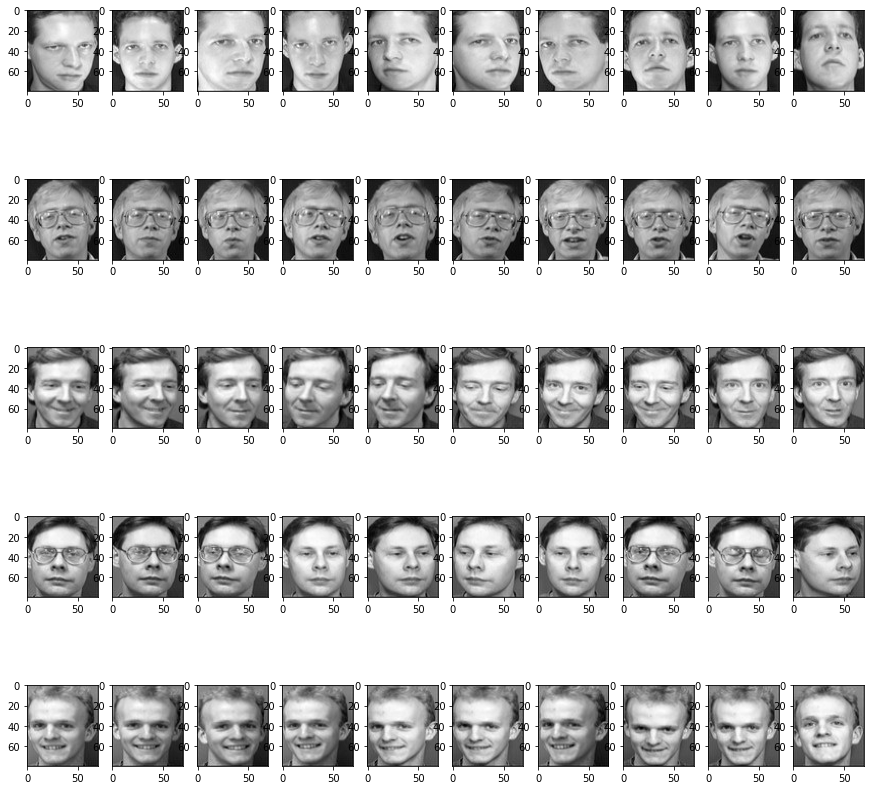

In [238]:
# Show the first 5 people
fig, axs = plt.subplots(5, 10, figsize=(15, 15))
for i, ax in enumerate(axs.flat):
    ax.imshow(img_1d[i].reshape(80, 70), cmap='gray')

# Rand Index

In [239]:
def rand_index(imgs, img_labels, clustering_algo_labels):
    tp = tn = fp = fn = 0
    for i in range(len(imgs)):
        for j in range(i+1, len(imgs)):
            # Two similiar items
            if img_labels[i] == img_labels[j]:
                # correctly assigned to the same cluster
                if clustering_algo_labels[i] == clustering_algo_labels[j]:
                    tp = tp + 1
                # incorrectly assigned to different clusters
                else:
                    fn = fn + 1
            # Two different items
            else:
                # incorrectly assigned to the same cluster
                if clustering_algo_labels[i] == clustering_algo_labels[j]:
                    fp = fp + 1
                # correctly assigned to different clusters
                else:
                    tn = tn + 1

    rand_index = (tp + tn) / (tp + tn + fp + fn)
    return rand_index

In [240]:
# Utility function to plot some of the clusters found by the clustering algorithms
def compare_labels(imgs, clustering_algo_labels, img_labels, n_instances=5):
    for clustering_algo_label in np.unique(clustering_algo_labels)[:n_instances]:
        if clustering_algo_label < 0:
            continue
        print("Cluster #", clustering_algo_label)
        matched_imgs = imgs[clustering_algo_labels== clustering_algo_label]
        actual_labels = img_labels[clustering_algo_labels == clustering_algo_label]
        plt.figure(figsize=(5, len(matched_imgs) * 1.5))
        for index, (matched_img, actual_label) in enumerate(zip(matched_imgs, actual_labels)):
            plt.subplot(len(matched_imgs), 5, index + 1)
            plt.imshow(matched_img.reshape(80, 70), cmap='gray')
            plt.axis("off")
            plt.title(actual_label)
        plt.show()

# K-Means

In [241]:
# K-Means
from sklearn.cluster import KMeans

In [242]:
kmeans = KMeans(n_clusters = 60).fit(img_1d)

Cluster # 0


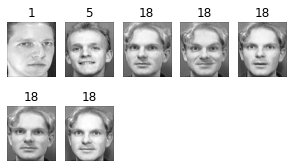

Cluster # 1


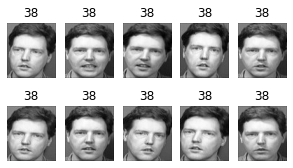

Cluster # 2


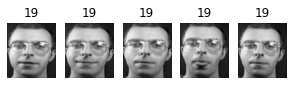

Cluster # 3


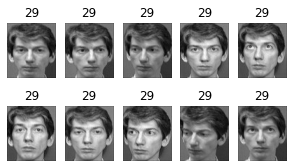

Cluster # 4


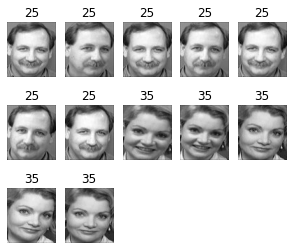

In [243]:
# Plot some of the clusters found by K-Means
compare_labels(img_1d, kmeans.labels_, img_labels)

### K-Means rand index

In [244]:
ri = np.round(rand_index(img_1d, img_labels, kmeans.labels_)*100, 3)
print("Rand Index for K-Means:" + str(ri) + "%")

Rand Index for K-Means:98.806%


# DBSCAN

In [245]:
# DBSCAN
from sklearn.cluster import DBSCAN

In [ ]:
# Naive brute force approach to find the best eps and min_samples for DBSCAN
max_ri = 0
max_ri_ep = 0
max_ri_ms = 0
for j in range(2, 5):
    for i in range(2000, 2500, 5):
        dbscan = DBSCAN(eps=i, min_samples=j).fit(img_1d)
        ri = np.round(rand_index(img_1d, img_labels, dbscan.labels_)*100, 3)
        if ri > max_ri:
            max_ri = ri
            max_ri_ep = i
            max_ri_ms = j
print(max_ri, max_ri_ep, max_ri_ms)

In [247]:
dbscan = DBSCAN(eps=2325, min_samples=3).fit(img_1d)

# Number of cluster without considering noise
if -1 in set(dbscan.labels_):
    print("Found:", len(set(dbscan.labels_)) - 1, "clusters.")
else:
    print("Found:", len(set(dbscan.labels_)), "clusters.")
    
ri = np.round(rand_index(img_1d, img_labels, dbscan.labels_)*100, 3)
print("Rand Index for DBSCAN:" + str(ri) + "%")

Found: 40 clusters.
Rand Index for DBSCAN:94.034%


Cluster # 0


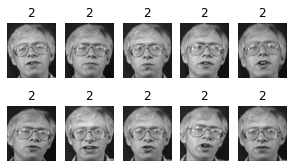

Cluster # 1


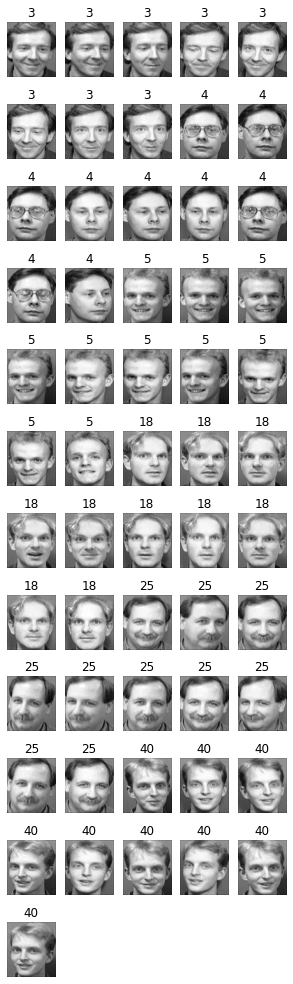

Cluster # 2


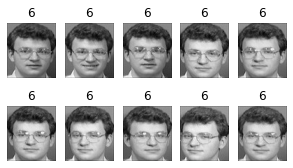

Cluster # 3


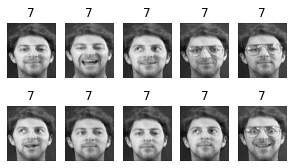

In [248]:
# Plot some of the clusters found by DBSCAN
# noise data are not shown
compare_labels(img_1d, dbscan.labels_, img_labels, n_instances=5)

### DBSCAN rand index

In [249]:
ri = np.round(rand_index(img_1d, img_labels, dbscan.labels_)*100, 3)
print("Rand Index for DBSCAN:" + str(ri) + "%")

Rand Index for DBSCAN:94.034%


# Agglomerative

In [250]:
from sklearn.cluster import AgglomerativeClustering

## Single Link

In [252]:
agglomerative_single_link = AgglomerativeClustering(linkage='single', n_clusters=41).fit(img_1d)
print("Found:", len(set(agglomerative_single_link.labels_)), "clusters.")

Found: 41 clusters.


Cluster # 0


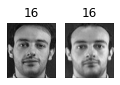

Cluster # 1


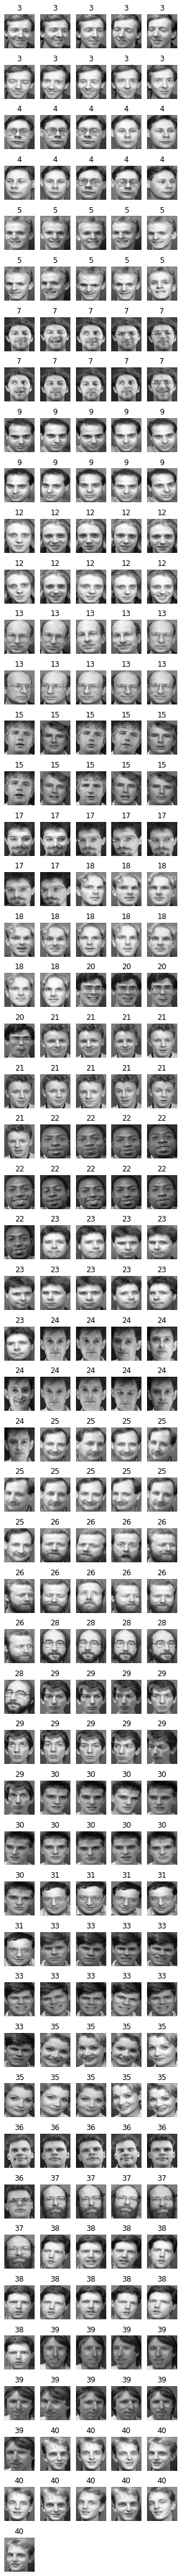

Cluster # 2


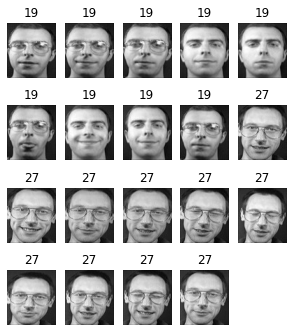

Cluster # 3


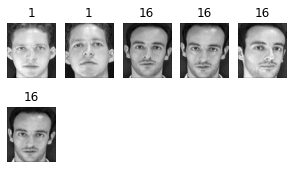

Cluster # 4


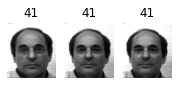

In [253]:
# Plot some of the clusters
compare_labels(img_1d, agglomerative_single_link.labels_, img_labels, n_instances=5)

### Agglomerative Single Link rand index

In [254]:
ri = np.round(rand_index(img_1d, img_labels, agglomerative_single_link.labels_)*100, 3)
print("Rand Index for Agglomerative Single Link:" + str(ri) + "%")

Rand Index for Agglomerative Single Link:63.295%


## Complete Link

In [255]:
agglomerative_complete_link = AgglomerativeClustering(linkage='complete', n_clusters=41).fit(img_1d)
print("Found:", len(set(agglomerative_complete_link.labels_)), "clusters.")

Found: 41 clusters.


Cluster # 0


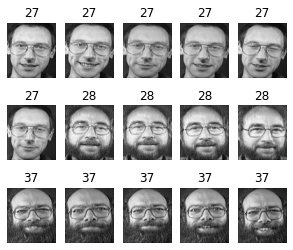

Cluster # 1


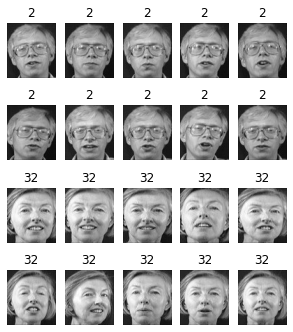

Cluster # 2


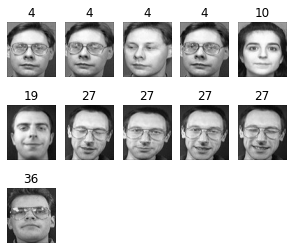

Cluster # 3


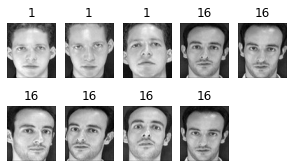

Cluster # 4


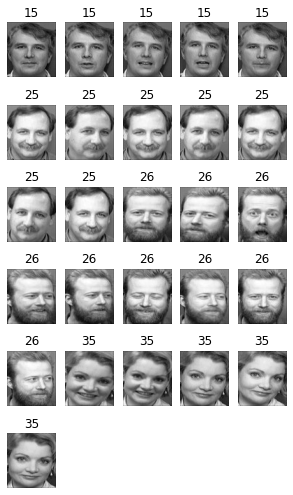

In [256]:
# Plot some of the clusters
compare_labels(img_1d, agglomerative_complete_link.labels_, img_labels, n_instances=5)

### Agglomerative Complete Link rand index

In [257]:
ri = np.round(rand_index(img_1d, img_labels, agglomerative_complete_link.labels_)*100, 3)
print("Rand Index for Agglomerative Complete Link:" + str(ri) + "%")

Rand Index for Agglomerative Complete Link:97.325%


## Group Average

In [258]:
agglomerative_group_average = AgglomerativeClustering(linkage='average', n_clusters=41).fit(img_1d)
print("Found:", len(set(agglomerative_single_link.labels_)), "clusters.")

Found: 41 clusters.


Cluster # 0


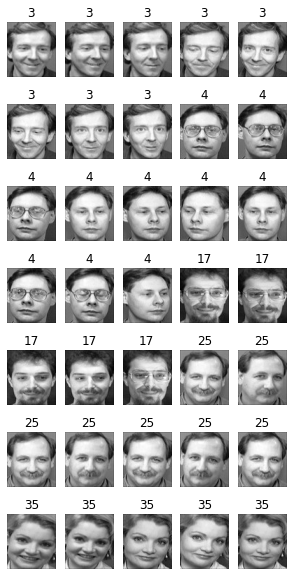

Cluster # 1


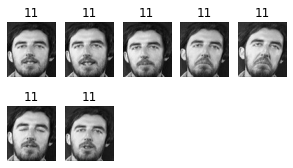

Cluster # 2


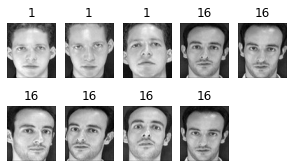

Cluster # 3


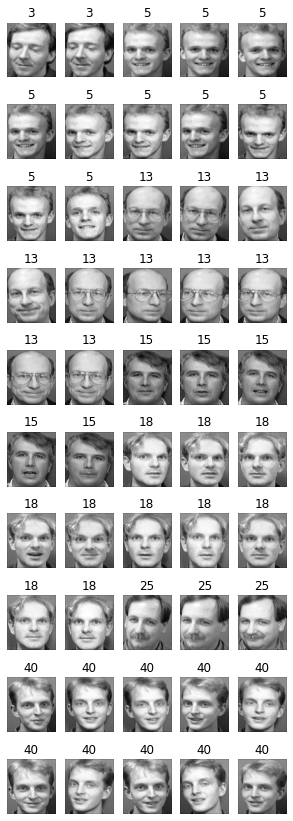

Cluster # 4


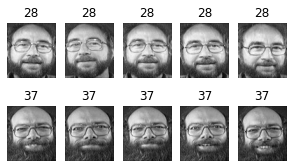

Cluster # 5


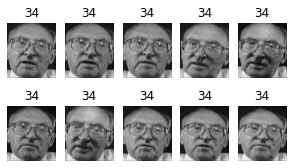

Cluster # 6


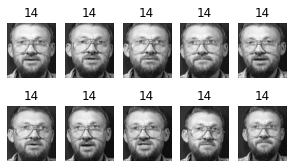

Cluster # 7


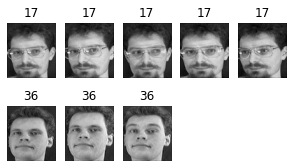

Cluster # 8


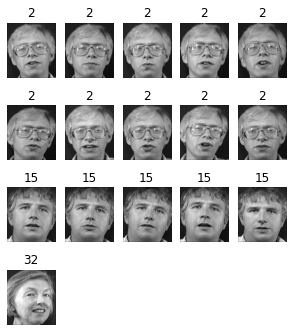

Cluster # 9


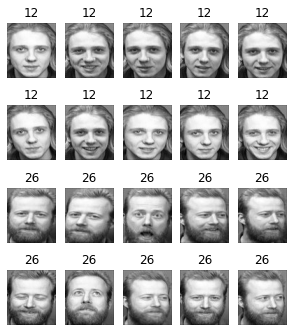

In [259]:
# Plot some of the clusters
compare_labels(img_1d, agglomerative_group_average.labels_, img_labels, n_instances=10)

### Agglomerative Group Average rand index

In [260]:
ri = np.round(rand_index(img_1d, img_labels, agglomerative_group_average.labels_)*100, 3)
print("Rand Index for Agglomerative Group Average:" + str(ri) + "%")

Rand Index for Agglomerative Group Average:95.601%


# DBSCAN on steroids

In [272]:
# First reduce the number of clusters found by dbscan

dbscan = DBSCAN(eps=2515, min_samples=3).fit(img_1d)

# Number of cluster without considering noise
if -1 in set(dbscan.labels_):
    print("Found:", len(set(dbscan.labels_)) - 1, "clusters.")
else:
    print("Found:", len(set(dbscan.labels_)), "clusters.")
    
ri = np.round(rand_index(img_1d, img_labels, dbscan.labels_)*100, 3)
print("Rand Index for DBSCAN:" + str(ri) + "%")

Found: 30 clusters.
Rand Index for DBSCAN:83.817%


In [273]:
# Find the cluster with the most number of elements (the chained cluster)
n_img_in_each_cluster_arr = np.unique(dbscan.labels_, return_counts=True)
n_img_in_each_cluster = {A: B for A, B in zip(n_img_in_each_cluster_arr[0], n_img_in_each_cluster_arr[1])}
n_img_in_each_cluster_sorted = dict(sorted(n_img_in_each_cluster.items(), key=lambda item: item[1], reverse=True))
cluster_with_maximum_n_img = list(n_img_in_each_cluster_sorted.keys())[0]
if cluster_with_maximum_n_img == -1:
    cluster_with_maximum_n_img = list(n_img_in_each_cluster_sorted.keys())[1]

In [274]:
chained_imgs = img_1d [dbscan.labels_ == cluster_with_maximum_n_img]

In [275]:
len(chained_actual_labels)

160

In [276]:
# Run the clustering algorithm with different parameters on the chained cluster in previous step
dbscan_rest = DBSCAN(eps=2305, min_samples=4).fit(chained_imgs)

# Number of cluster without considering noise
if -1 in set(dbscan_rest.labels_):
    print("Found:", len(set(dbscan_rest.labels_)) - 1, "clusters.")
else:
    print("Found:", len(set(dbscan_rest.labels_)), "clusters.")

Found: 11 clusters.


In [278]:
# Update the labels for the newly found clusters
max_label_number = max(set(dbscan.labels_)) + 1
j = 0
new_labels = dbscan.labels_.copy()
for i in range(len(dbscan.labels_)):
    if dbscan.labels_[i] == cluster_with_maximum_n_img:
        if dbscan_rest.labels_[j] == -1:
            new_labels[i] = -1
        else:
            new_labels[i] = dbscan_rest.labels_[j] + max_label_number
        j = j + 1

In [279]:
new_labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, 30, 30, 30, -1, -1, 30, 30, 30, 30, 30, -1, 31, -1, 31,
       31, -1, 31, -1, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 33, -1,  5,  5,  5,  5,  5,  5,  5,  5, -1,  6, -1,
        6, -1, -1,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  8, -1, -1,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, -1,
       -1, -1, -1, -1, 10, 34, 10, 10, 34, 10, 34, 10, 34, 34, -1, 11, 11,
       -1, -1, -1, -1, -1, -1, 11, 12, 12, -1, -1, 12, 13, 13, 13, 13, 13,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 14, 14, 14, 14, 14, 14, 14,
       14, -1, 14, 15, 15, 15, -1, 16, -1, 16, 16, 16, 15, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37,
       -1, 37, 37, -1, 37

In [280]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  5,  5,  5,  5,  5,  5,  5,  5, -1,  6, -1,
        6, -1, -1,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  8, -1, -1,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, -1,
       -1, -1, -1, -1, 10,  1, 10, 10,  1, 10,  1, 10,  1,  1, -1, 11, 11,
       -1, -1, -1, -1, -1, -1, 11, 12, 12, -1, -1, 12, 13, 13, 13, 13, 13,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 14, 14, 14, 14, 14, 14, 14,
       14, -1, 14, 15, 15, 15, -1, 16, -1, 16, 16, 16, 15,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

Cluster # 0


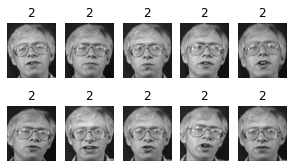

Cluster # 2


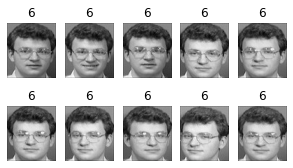

Cluster # 3


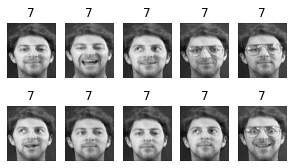

Cluster # 4


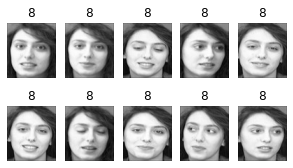

Cluster # 5


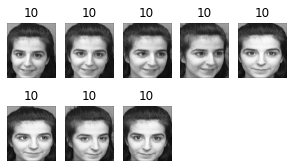

Cluster # 6


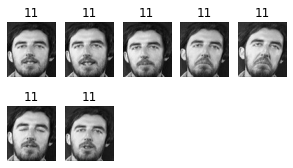

Cluster # 7


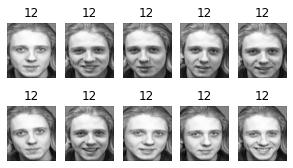

Cluster # 8


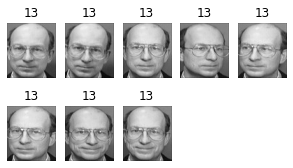

Cluster # 9


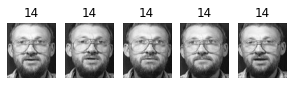

In [281]:
compare_labels(img_1d, new_labels, img_labels, n_instances=10)

In [282]:
print("Old DBSCAN")
ri = np.round(rand_index(img_1d, img_labels, dbscan.labels_)*100, 3)
print("Rand Index for DBSCAN:" + str(ri) + "%")
if -1 in set(dbscan.labels_):
    print("Found:", len(set(dbscan.labels_)) - 1, "clusters.")
else:
    print("Found:", len(set(dbscan.labels_)), "clusters.")

Old DBSCAN
Rand Index for DBSCAN:83.817%
Found: 30 clusters.


In [283]:
print("DBSCAN on steroids")
ri = np.round(rand_index(img_1d, img_labels, new_labels)*100, 3)
if -1 in set(new_labels):
    print("Found:", len(set(new_labels)) - 1, "clusters.")
else:
    print("Found:", len(set(new_labels)), "clusters.")
print("Rand Index for DBSCAN:" + str(ri) + "%")

DBSCAN on steroids
Found: 40 clusters.
Rand Index for DBSCAN:95.507%
